## Understanding Expectation Maximization

### Background:

__Maximum likelihood estimation__ is an approach to density estimation for a dataset by searching across probability distributions and their parameters. However, when the target variables are not observed or hidden (so called __Latent Variables__), MLE becomes intractable. 

The __Expectation-Maximization__ algorithm is an approach to perform the MLE in the presence of latent variables. It involves 2 steps (as the name suggests) which run until convergence:
1. Estimating the values of latent variables
2. Optimizing the model

To make things more easy, we try to run both the K-Means clustering algorithm and the EM algorithm on a simple weights-heights dataset.

In [1]:
import pandas as pd

# Reading data
data = pd.read_csv('Clustering_gmm.csv')

data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


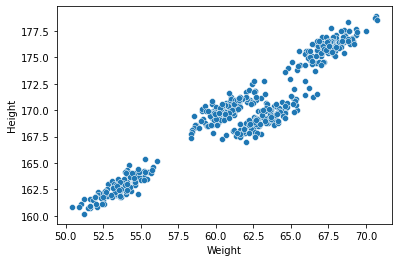

In [2]:
import seaborn as sns

# Vizualinzing data
sns.scatterplot(x = 'Weight',
                      y = 'Height',
                      data = data)

So we can identify 4 clusters from this data, we first use the K-Means model to see if it can correctly identify the 4 clusters. 

In [3]:
# Training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [4]:
# Predictions from kmeans
knn_pred = kmeans.predict(data)
knn_frame = pd.DataFrame(data)
knn_frame['cluster'] = knn_pred
knn_frame.columns = ['Weight', 'Height', 'cluster']

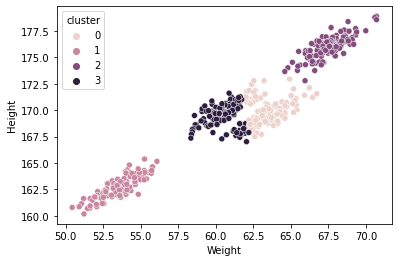

In [5]:
# Visualizing predicted clusters
x = sns.scatterplot(x = 'Weight',
                y = 'Height',
                hue = 'cluster',
                data = knn_frame)

x

We can observe that the K-means alogorithm could not correctly differentiate between the clusters 1 and 2, mainly because K-means just focuses on the mean and not the variance. Let us now see if Expectation Maximization is any different. 

In [20]:
# Training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(data)

GaussianMixture(n_components=4)

In [21]:
# Predictions from gmm
gmm_pred = gmm.predict(data)
gmm_frame = pd.DataFrame(data)
gmm_frame['cluster'] = gmm_pred
gmm_frame.columns = ['Weight', 'Height', 'cluster']

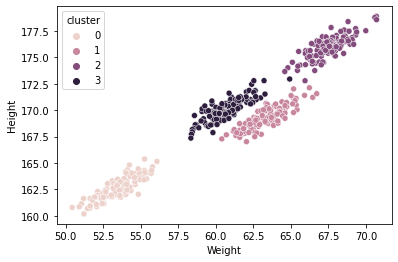

In [22]:
# Visualizing predicted clusters
y = sns.scatterplot(x = 'Weight',
                y = 'Height',
                hue = 'cluster',
                data = gmm_frame)

y

Well, we can see how effectively the Expectation Maximization algorithm was able to correctly identify the 4 clusters essentially because of the use of Gaussian Mixture models here, which in addition to means also has an additional covariance parameter to optimize!